   Network Formulation Relaxation Demand Eta Horizon Tau Range    Instance  \
0        5         ORI        MIP     d1  e1     h24        t2  5d1e1h24t2   
1        5         ORI        MIP     d1  e1     h24        t4  5d1e1h24t4   
2        5         ORI        MIP     d1  e3     h24        t1  5d1e3h24t1   
3        5         ORI        MIP     d1  e4     h24        t1  5d1e4h24t1   
4        5         ORI        MIP     d1  e4     h24        t4  5d1e4h24t4   
5        5         ORI        MIP     d2  e1     h24        t2  5d2e1h24t2   
6        5         ORI        MIP     d2  e1     h24        t4  5d2e1h24t4   
7        5         ORI        MIP     d2  e1     h48        t3  5d2e1h48t3   
8        5         ORI        MIP     d2  e2     h48        t3  5d2e2h48t3   
9        5         ORI        MIP     d2  e4     h24        t2  5d2e4h24t2   

    Profit   Time (s)  Relative Gap  
0   4043.0   1771.019           0.0  
1   4043.0   2547.466           0.0  
2   4189.1   3389.970      

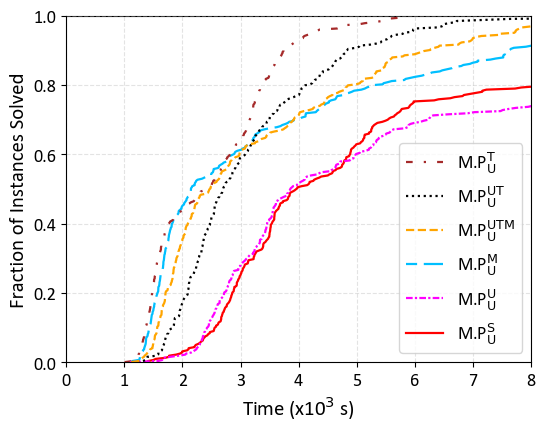

Number of unique instances before filtering: 663
Number of instances used in performance chart: 323


In [ ]:
#%% Imports

import pandas as pd

import matplotlib as mpl

import matplotlib.pyplot as plt

import matplotlib.ticker as ticker

import numpy as np


# Read in Excel Data

excel_file_path1 = 'results/Results.xlsx'

df = pd.read_excel(excel_file_path1, sheet_name='UTG_Profit')

print(df.head(10))


# Generate Instance column and populate

def create_name(row):

    return f"Network{row['Network']}.{row['Relaxation']}.{row['Demand']}.{row['Eta']}.{row['Horizon']}.{row['Tau Range']}"

df['Instance'] = df.apply(create_name, axis=1)


# Ensure Relative Gap is numeric and fill NAs with a high value to mark them as invalid

df['Relative Gap'] = pd.to_numeric(df['Relative Gap'], errors='coerce')  # Convert to numeric, coerce bad values to NaN

df['Relative Gap'] = df['Relative Gap'].fillna(999)  # Treat NaNs as invalid by setting a large dummy value


# Filter out instances with any formulation having Relative Gap > 0.001

invalid_instances = df[df['Relative Gap'] > 0.001]['Instance'].unique()

df_filtered = df[~df['Instance'].isin(invalid_instances)].copy()


# Identify all unique formulations

all_formulations = df_filtered['Formulation'].unique()

formulation_counts = df_filtered.groupby('Instance')['Formulation'].nunique()


# Keep only instances that have data from all formulations

complete_instances = formulation_counts[formulation_counts == len(all_formulations)].index

df_filtered = df_filtered[df_filtered['Instance'].isin(complete_instances)].copy()


# Sort instances by minimum time for plotting

instance_order = df_filtered.groupby('Instance')['Time (s)'].min().sort_values().index


# Create a mapping for instances to y-axis positions

instance_mapping = {inst: i for i, inst in enumerate(instance_order)}

df_filtered['Y Position'] = df_filtered['Instance'].map(instance_mapping)


# Define custom styles for individual formulation curves

formulation_styles = {

    'ORI': {'linestyle': 'solid', 'marker': 'o', 'color': 'red'},

    'UTG.UTG': {'linestyle': 'dotted', 'marker': '*', 'color': 'black'},

    'UTG.UTM': {'linestyle': 'dashed', 'marker': 'p', 'color': 'orange'},

    'UTG.SHG': {'linestyle': 'dashdot', 'marker': 'D', 'color': 'lawngreen'},

    'UTG.MSG': {'linestyle': (5, (10, 3)), 'marker': 's', 'color': 'deepskyblue'},

    'UTG.TSG': {'linestyle': (0, (3, 5, 1, 5)), 'marker': '^', 'color': 'brown'},

    'UTG.USG': {'linestyle': (0, (3, 1, 1, 1)), 'marker': '+', 'color': 'magenta'},

#    'Formulation_H': {'linestyle': (0, (5, 1)), 'marker': 'o', 'color': 'cyan'}

}

# linestyles: solid,dotted,dashed,dashdot,(5, (10, 3)),(0, (3, 5, 1, 5)),(0, (3, 1, 1, 1)),(0, (5, 1))

# markers: D * p o ^ +

# colors: lawngreen,green,cyan,deepskyblue,royalblue,mediumpurple,darkviolet,magenta,hotpink)

formulation_handles = {}

# Desired order of formulations in the legend

desired_legend_order = ['UTG.TSG', 'UTG.SHG', 'UTG.UTG', 'UTG.UTM', 'UTG.MSG', 'UTG.USG', 'ORI']

# Map raw formulation names to pretty LaTeX-style labels

legend_labels = {

    'ORI': r'M.P$^{\mathrm{S}}_{\mathrm{U}}$',

    'UTG.UTG': r'M.P$^{\mathrm{UT}}_{\mathrm{U}}$',

    'UTG.UTM': r'M.P$^{\mathrm{UTM}}_{\mathrm{U}}$',

    'UTG.MSG': r'M.P$^{\mathrm{M}}_{\mathrm{U}}$',

    'UTG.TSG': r'M.P$^{\mathrm{T}}_{\mathrm{U}}$',

    'UTG.USG': r'M.P$^{\mathrm{U}}_{\mathrm{U}}$',

    'UTG.SHG': r'M.P$^{\mathrm{HG}}_{\mathrm{U}}$',

    'Formulation_H': r'Formulation$_{\mathrm{H}}$'

}


# Plot performance chart

plt.figure(figsize=(6, 4.5))

for formulation, group in df_filtered.groupby('Formulation'):

    group_sorted = group.sort_values(by='Time (s)')  # Sort each formulation's data by time

    total_instances = len(instance_order)

    y_positions = np.arange(len(group_sorted)) / total_instances  # Normalize to [0, 1]

    style = formulation_styles.get(formulation, {'linestyle': '-', 'marker': 'o', 'color': 'red'})

    

    line, = plt.plot(group_sorted['Time (s)'] /1000,

        y_positions,

        linestyle=style['linestyle'],

        # marker=style['marker'],

        color=style['color'],                 # Set the line color

        markerfacecolor=style['color'],       # Explicitly set marker face color

        markeredgecolor=style['color'],       # Explicitly set marker edge color

        markersize=5,                         # Reduced marker size

        linewidth=1.6,                          # Increase line thickness here

        label=legend_labels.get(formulation, formulation))

    formulation_handles[formulation] = line


# Set other plot properties

axis_number_size = 13

axis_label_size = 15

font_family = 'calibri'


plt.xlabel(r'Time (x10$^3$ s)', fontdict={'family': font_family, 'size': axis_label_size})

plt.ylabel("Fraction of Instances Solved", fontdict={'family': font_family, 'size': axis_label_size})

plt.xticks(fontsize=axis_number_size, fontname=font_family)

plt.yticks(fontsize=axis_number_size, fontname=font_family)

plt.tick_params(axis='x', labelsize=axis_number_size)

plt.tick_params(axis='y', labelsize=axis_number_size)

#plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

#plt.title('Performance Chart', fontdict={'family': font_family, 'size': 16, 'weight': 'bold'})

plt.grid(True, linestyle='--', alpha=0.35)

#plt.xscale('log')

plt.xlim(0, 8)

plt.ylim(0, 1.00)

top_spine = plt.gca().spines['top']

top_spine.set_zorder(0)  # Move behind the plot lines


# Filter for only the formulations that were actually plotted

ordered_handles = [

    formulation_handles[form] for form in desired_legend_order if form in formulation_handles

]

ordered_labels = [

    legend_labels[form] for form in desired_legend_order if form in formulation_handles

]

# Apply ordered legend

plt.legend(ordered_handles, ordered_labels,

           loc='lower right', prop={'family': font_family, 'size': axis_number_size})

#plt.legend(loc='lower right', title='Formulation', prop={'family': font_family, 'size': axis_number_size})

plt.show()


print(f"Number of unique instances before filtering: {df['Instance'].nunique()}")

print(f"Number of instances used in performance chart: {len(instance_order)}")

# %%
